In [1]:
from pathlib import Path
from utils import new_graph, print_graph

In [2]:
file = Path.cwd() / "data" / "Email-Enron.txt"

g = new_graph(file)

In [ ]:
print_graph(g)

### Histograma

In [ ]:
qty_edges = lambda x : int(x.size() / 2)

data = [qty_edges(g.adj[i]) for i in range(g.V)]

Matplotlib

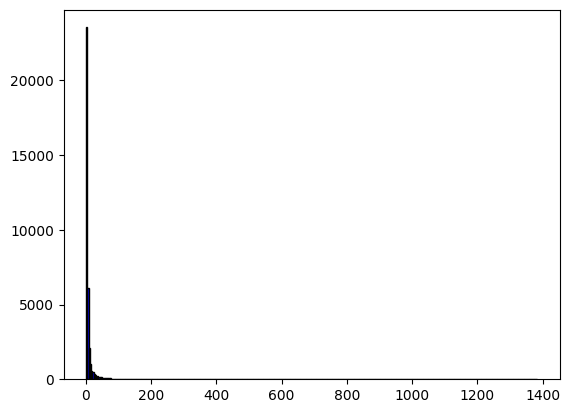

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data, bins=g.V//100, color='blue', edgecolor='black')

plt.show()

Plotly

In [ ]:
import plotly.express as px
import plotly.io as pio
import pandas as pd

pio.renderers.default = "browser"

df = pd.DataFrame({"degree": data})
fig = px.histogram(df, nbins=100)
fig.show()